In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Input: (validation/test,prediction)  after train-test split  
# Remark: computation over real prices 
def mean_error_per(val,pred):
    total=0
    for i in range(len(val)):
        total = total + (np.abs(np.exp(val).iloc[i] - np.exp(pred)[i])/np.exp(val).iloc[i])*100
    return total/len(val) 

In [3]:
# actual/prediction performance table 
# Input: target sütunu ile tahmin sütunu girilir
# Remark: linear model is used for predicting log(price).That's why we apply exp function to actual and predicted prices

def my_table(val,pred):
    my_dict = {"Actual":[],"Prediction":[],"Diff":[],"EP":[],"Error_Per":[],"+/-":[]}
    for i in range(len(val)):
        my_dict["Actual"].append(round(np.floor(np.exp(val)).iloc[i]) )
        my_dict["Prediction"].append( round(np.exp(pred)[i]))
        my_dict["Diff"].append(round(np.exp(pred)[i])-np.floor(np.exp(val)).iloc[i])
        diff = np.exp(pred)[i] - np.exp(val).iloc[i]
        if (diff > 0):
            my_dict["+/-"].append("+")
        elif (0 > diff) :
            my_dict["+/-"].append("-")
        my_dict["Error_Per"].append( round((np.abs(diff)/np.exp(val).iloc[i])*100,2) )
        my_dict["EP"].append( round((diff/np.exp(val).iloc[i])*100,2)   )
    table = pd.DataFrame(my_dict)
   
    print("Mean Error Percentage : ",mean_error_per(val,pred))
    print("Mean Squared Error    : ",np.mean((pred - val)**2))
    return table 

In [4]:
df = pd.read_csv("clean_data_new.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Brand,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Kullanım Amacı,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,Star,Çözünürlük,Çözünürlük Standartı,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi
0,LENOVO,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,20759.0,16,4,256.0,4.84,1.0,2.0,5.0,AMD Ryzen 5,6.0,Free Dos
1,ACER,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,15599.0,8,4,512.0,4.77,1.0,2.0,5.0,AMD Ryzen 5,6.0,Free Dos
2,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Marka Grantili,Oyun,17950.0,16,4,512.0,4.78,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos
3,ASUS,3.0,0,15.6,DDR4,0.0,2.0,Marka Grantili,Ofis - İş,12028.0,8,4,256.0,4.81,1.0,2.0,11.0,Intel Core i5,4.0,Windows
4,ASUS,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,22499.0,16,4,1024.0,5.00,1.0,2.0,4.0,AMD Ryzen 7,8.0,Free Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,64,4,512.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Windows
2114,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,32,4,512.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos
2115,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,16,4,1024.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos
2116,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,16,4,512.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos


# Exploratory of Data Analyisis

In [5]:
df["SSD Kapasitesi"].replace({250:240,120:128},inplace=True)

In [6]:
df["SSD Kapasitesi"].value_counts()

512.0     857
1024.0    573
2048.0    290
256.0     252
500.0      87
240.0      32
128.0      23
4096.0      2
8.0         1
64.0        1
Name: SSD Kapasitesi, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      2118 non-null   object 
 1   Cihaz Ağırlığı             2118 non-null   float64
 2   Dokunmatik Ekran           2118 non-null   int64  
 3   Ekran Boyutu               2118 non-null   float64
 4   Ekran Kartı Bellek Tipi    2118 non-null   object 
 5   Ekran Kartı Hafızası       2118 non-null   float64
 6   Garanti Süresi             2118 non-null   float64
 7   Garanti Tipi               2118 non-null   object 
 8   Kullanım Amacı             2118 non-null   object 
 9   Price                      2118 non-null   float64
 10  Ram (Sistem Belleği)       2118 non-null   int64  
 11  Ram (Sistem Belleği) Tipi  2118 non-null   int64  
 12  SSD Kapasitesi             2118 non-null   float64
 13  Star                       2118 non-null   float

 işlemci tipi sıralanabilir ancak dummy değişkeni olarak aldık

In [8]:
# new_df["Ram"] = new_df["Ram (Sistem Belleği)"]*new_df["Ram (Sistem Belleği) Tipi"]

In [9]:
# new_df["İşlemci"] = new_df["İşlemci Nesli"]*new_df["İşlemci Çekirdek Sayısı"]

In [10]:
# new_df["Çözünürlük Çarpım"] = new_df["Çözünürlük"]*new_df["Çözünürlük Standartı"]

In [11]:
# new_df.drop(["Ram (Sistem Belleği)","Ram (Sistem Belleği) Tipi","İşlemci Nesli","İşlemci Çekirdek Sayısı","Çözünürlük","Çözünürlük Standartı"],axis=1,inplace=True)

In [12]:
df

,Brand,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Kullanım Amacı,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,Star,Çözünürlük,Çözünürlük Standartı,İşlemci Nesli,İşlemci Tipi,İşlemci Çekirdek Sayısı,İşletim Sistemi
0,LENOVO,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,20759.0,16,4,256.0,4.84,1.0,2.0,5.0,AMD Ryzen 5,6.0,Free Dos
1,ACER,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,15599.0,8,4,512.0,4.77,1.0,2.0,5.0,AMD Ryzen 5,6.0,Free Dos
2,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Marka Grantili,Oyun,17950.0,16,4,512.0,4.78,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos
3,ASUS,3.0,0,15.6,DDR4,0.0,2.0,Marka Grantili,Ofis - İş,12028.0,8,4,256.0,4.81,1.0,2.0,11.0,Intel Core i5,4.0,Windows
4,ASUS,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,22499.0,16,4,1024.0,5.00,1.0,2.0,4.0,AMD Ryzen 7,8.0,Free Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,64,4,512.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Windows
2114,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,32,4,512.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos
2115,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,16,4,1024.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos
2116,Dell,2.0,0,15.6,GDDR6,4.0,2.0,Resmi Distribütör Garantili,Oyun,29999.0,16,4,512.0,0.00,1.0,2.0,11.0,Intel Core i5,6.0,Free Dos


<AxesSubplot:xlabel='Price', ylabel='Count'>

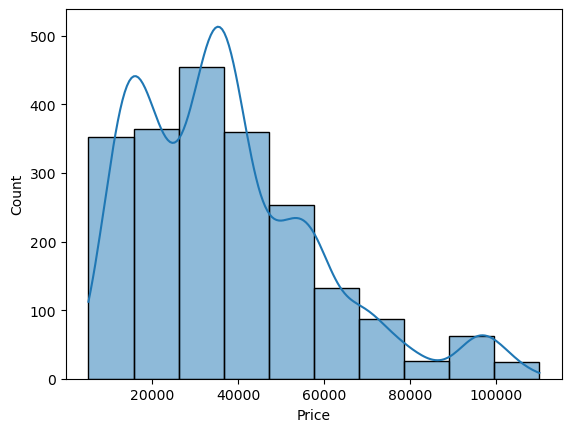

In [13]:
sns.histplot(data = df['Price'], kde=True,bins=10)

In [14]:
df['Price_Log'] = np.log(df['Price'])

<AxesSubplot:xlabel='Price_Log', ylabel='Count'>

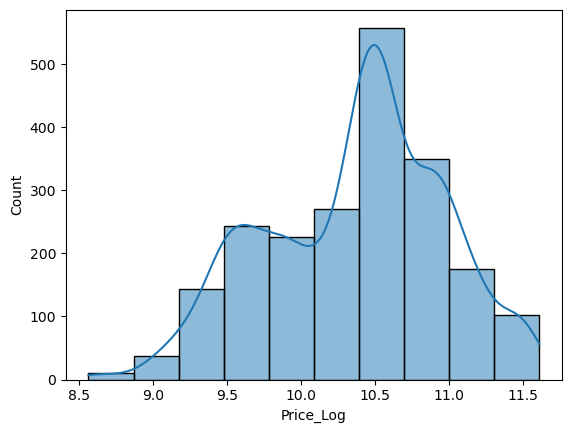

In [15]:
sns.histplot(data = df['Price_Log'], kde=True,bins=10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      2118 non-null   object 
 1   Cihaz Ağırlığı             2118 non-null   float64
 2   Dokunmatik Ekran           2118 non-null   int64  
 3   Ekran Boyutu               2118 non-null   float64
 4   Ekran Kartı Bellek Tipi    2118 non-null   object 
 5   Ekran Kartı Hafızası       2118 non-null   float64
 6   Garanti Süresi             2118 non-null   float64
 7   Garanti Tipi               2118 non-null   object 
 8   Kullanım Amacı             2118 non-null   object 
 9   Price                      2118 non-null   float64
 10  Ram (Sistem Belleği)       2118 non-null   int64  
 11  Ram (Sistem Belleği) Tipi  2118 non-null   int64  
 12  SSD Kapasitesi             2118 non-null   float64
 13  Star                       2118 non-null   float

In [17]:
df.columns

Index(['Brand', 'Cihaz Ağırlığı', 'Dokunmatik Ekran', 'Ekran Boyutu',
       'Ekran Kartı Bellek Tipi', 'Ekran Kartı Hafızası', 'Garanti Süresi',
       'Garanti Tipi', 'Kullanım Amacı', 'Price', 'Ram (Sistem Belleği)',
       'Ram (Sistem Belleği) Tipi', 'SSD Kapasitesi', 'Star', 'Çözünürlük',
       'Çözünürlük Standartı', 'İşlemci Nesli', 'İşlemci Tipi',
       'İşlemci Çekirdek Sayısı', 'İşletim Sistemi', 'Price_Log'],
      dtype='object')

# Model Selection

## Linear Regression

Convert data types from object to numeric: Brand, Ekran Kartı Bellek Tipi,  Garanti Tipi, Kullanım Amacı, İşlemci Tipi, İşletim Sistemi   

### Considering only numerical features:

Star kolonuna gerek duymuyorum.

In [18]:
X = df[['Cihaz Ağırlığı',"Dokunmatik Ekran",'Ekran Boyutu', 'Ekran Kartı Hafızası',"Garanti Süresi","Star",
                  "SSD Kapasitesi","Çözünürlük Standartı","Ram (Sistem Belleği)","Ram (Sistem Belleği) Tipi",
        "İşlemci Nesli","İşlemci Çekirdek Sayısı","Çözünürlük"]]
y =df.Price_Log

In [19]:
# Modeli Oluşturma
model = sm.OLS(y, X)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          9.466e+04
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:06:36   Log-Likelihood:                         -1213.0
No. Observations:                2118   AIC:                                      2452.
Df Residuals:                    2105   BIC:                                      2526.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Cihaz Ağırlığı                0.2371      0.024     10.069      0.000       0.191       0.283
Dokunmatik Ekran              0.1532      0.068      2.254      0.024       0.020       0.286
Ekran Boyutu                  0.4263      0.005     78.901      0.000       0.416       0.437
Ekran Kartı Hafızası          0.0556      0.006      9.786      0.000       0.044       0.067
Garanti Süresi                0.7116      0.025     28.420      0.000       0.663       0.761
Star                         -0.0332      0.005     -6.487      0.000      -0.043      -0.023
SSD Kapasitesi                0.0001    1.8e-05      7.348      0.000    9.69e-05       0.000
Çözünürlük Standartı          0.0992      0.026      3.843      0.000       0.049       0.150
Ram (Sistem Belleği)          0.0055      0.001     10.415      0.000       0.004       0.006
Ram (Sistem Belleği) Tipi     0.0756      0.008      8.928      0.000       0.059       0.092
İşlemci Nesli                 0.0229      0.004      5.728      0.000       0.015       0.031
İşlemci Çekirdek Sayısı       0.0157      0.004      3.809      0.000       0.008       0.024
Çözünürlük                    0.2161      0.034      6.271      0.000       0.148       0.284
==============================================================================
Omnibus:                       94.197   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.850
Skew:                           0.377   Prob(JB):                     1.06e-33
Kurtosis:                       4.074   Cond. No.                     7.36e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from joblib import load
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedKFold


In [21]:
from sklearn.model_selection import KFold, train_test_split
# veriyi 80 e 20 ayırdık
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
# Cross-validation index oluşturmasına yardımcı olmak için
X1, y1 = np.array(X1), np.array(y1)
    
# Verimizi 5 parçaya ayırmaya deneyelim (n_splits=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
# Validation sonuçlarını toplayacağımız listeler
cv_lm_r2 = []
cv_lm_ridge_r2 = []
    
for train_ind, val_ind in kf.split(X1,y1):
    X_train, y_train = X1[train_ind], y1[train_ind]
    X_val, y_val = X1[val_ind], y1[val_ind] 
        
    # Modellerin oluşturulması
    lm = LinearRegression()
    lm_ridge = Ridge(alpha=100)
    # Modellerin eğitimi
    lm.fit(X_train, y_train)
    cv_lm_r2.append(round(lm.score(X_val, y_val),3))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    cv_lm_ridge_r2.append(round(lm_ridge.score(X_val_scaled, y_val),3))

# Sonuçların toplanması
print('Simple linear regression scores: ', cv_lm_r2)
print('Ridge scores: ', cv_lm_ridge_r2, '\n')

print(f'Mean r^2 score for linear model: {np.mean(cv_lm_r2):.3f} +- {np.std(cv_lm_r2):.3f}')
print(f'Mean r^2 score for Ridge model: {np.mean(cv_lm_ridge_r2):.3f} +- {np.std(cv_lm_ridge_r2):.3f}')

Simple linear regression scores:  [0.819, 0.812, 0.757, 0.812, 0.813]
Ridge scores:  [0.815, 0.809, 0.76, 0.814, 0.811] 

Mean r^2 score for linear model: 0.803 +- 0.023
Mean r^2 score for Ridge model: 0.802 +- 0.021


In [22]:
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
# evaluate model
scores_r2_list = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
print("R-score sequence for ridge model(logPrice):",scores_r2_list)
print(f'Mean R-score for ridge model(logPrice): {np.mean(scores_r2_list):.3f} +- {np.std(scores_r2_list):.3f}')

scores_neg_mae_list = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_mae_list = np.absolute(scores_neg_mae_list)
print("Absolute Error (log_price) sequence:",scores_mae_list)
print(f'Mean Absolute Error (log_price) for ridge model: {np.mean(scores_mae_list):.3f} +- {np.std(scores_mae_list):.3f}')

R-score sequence for ridge model(logPrice): [0.84048593 0.76568823 0.80544315 0.80589698 0.78461135]
Mean R-score for ridge model(logPrice): 0.800 +- 0.025
Absolute Error (log_price) sequence: [0.17604212 0.21144398 0.20322397 0.19333839 0.20351872]
Mean Absolute Error (log_price) for ridge model: 0.198 +- 0.012


## Applying Get Dummies

In [23]:
df = pd.get_dummies(df, columns=["Brand","Ekran Kartı Bellek Tipi","Kullanım Amacı","İşlemci Tipi"], drop_first=True)
df

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
0,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,20759.0,16,4,256.0,...,0,0,1,0,0,0,0,0,0,0
1,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,15599.0,8,4,512.0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,0,15.6,4.0,2.0,Marka Grantili,17950.0,16,4,512.0,...,0,0,0,0,0,0,1,0,0,0
3,3.0,0,15.6,0.0,2.0,Marka Grantili,12028.0,8,4,256.0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,22499.0,16,4,1024.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,64,4,512.0,...,0,0,0,0,0,0,1,0,0,0
2114,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,32,4,512.0,...,0,0,0,0,0,0,1,0,0,0
2115,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,16,4,1024.0,...,0,0,0,0,0,0,1,0,0,0
2116,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,29999.0,16,4,512.0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X1 = df.drop(["Price","Price_Log","Garanti Tipi","İşletim Sistemi"],axis=1)
y1 = df.Price_Log

# Train/Test Ayrımı
X1_train, x1_test, Y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x1_train, x1_val, y1_train, y1_val = train_test_split(X1_train, Y1_train, test_size=0.25, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

# Modeli Oluşturma
lreg1 = LinearRegression()

lreg1.fit(x1_train,y1_train)

pred1 = lreg1.predict(x1_val)

# MSE Hesabı
mse1 = np.mean((pred1 - y1_val)**2)
print("MSE: ", mse1)
# Mean Error Percentage

# R2 Skor
print("R2 Score: ", lreg1.score(x1_val, y1_val))

MSE:  0.03278678155860713
R2 Score:  0.9113600825737832


In [26]:
# Modeli Oluşturma
model1 = sm.OLS(y1_train, x1_train)

# Modeli Eğitme
fit1 = model1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.872e+04
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:06:41   Log-Likelihood:                         -517.64
No. Observations:                1270   AIC:                                      1105.
Df Residuals:                    1235   BIC:                                      1285.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Cihaz Ağırlığı                    0.1952      0.029      6.691      0.000       0.138       0.252
Dokunmatik Ekran                  0.1354      0.076      1.790      0.074      -0.013       0.284
Ekran Boyutu                      0.3789      0.009     41.531      0.000       0.361       0.397
Ekran Kartı Hafızası             -0.0039      0.009     -0.439      0.661      -0.021       0.014
Garanti Süresi                    0.4982      0.034     14.619      0.000       0.431       0.565
Ram (Sistem Belleği)              0.0037      0.001      6.398      0.000       0.003       0.005
Ram (Sistem Belleği) Tipi         0.0708      0.012      5.958      0.000       0.047       0.094
SSD Kapasitesi                  9.27e-05   2.01e-05      4.602      0.000    5.32e-05       0.000
Star                             -0.0244      0.007     -3.750      0.000      -0.037      -0.012
Çözünürlük                        0.2320      0.041      5.699      0.000       0.152       0.312
Çözünürlük Standartı              0.0313      0.029      1.082      0.279      -0.025       0.088
İşlemci Nesli                     0.0211      0.010      2.117      0.034       0.002       0.041
İşlemci Çekirdek Sayısı           0.0014      0.005      0.264      0.792      -0.009       0.012
Brand_ASUS                        0.4024      0.065      6.203      0.000       0.275       0.530
Brand_Apple                       1.6283      0.382      4.264      0.000       0.879       2.378
Brand_Dell                        0.5035      0.070      7.196      0.000       0.366       0.641
Brand_HP                          0.3947      0.067      5.922      0.000       0.264       0.526
Brand_LENOVO                      0.5105      0.064      8.036      0.000       0.386       0.635
Brand_MSI                         0.4639      0.093      5.005      0.000       0.282       0.646
Ekran Kartı Bellek Tipi_DDR4     -0.0744      0.092     -0.812      0.417      -0.254       0.105
Ekran Kartı Bellek Tipi_GDDR5    -0.0784      0.090     -0.867      0.386      -0.256       0.099
Ekran Kartı Bellek Tipi_GDDR6     0.0650      0.092      0.705      0.481      -0.116       0.246
Ekran Kartı Bellek Tipi_SD       -0.2959      0.091     -3.251      0.001      -0.474      -0.117
Kullanım Amacı_Ofis - İş          0.4017      0.054      7.501      0.000       0.297       0.507
Kullanım Amacı_Oyun               0.4001      0.059      6.805      0.000       0.285       0.515
Kullanım Amacı_Tasarım           -0.0196      0.165     -0.119      0.905      -0.343       0.304
İşlemci Tipi_AMD Ryzen 3          0.6705      0.167      4.013      0.000       0.343       0.998
İşlemci Tipi_AMD Ryzen 5          1.0229    

In [27]:
np.abs(np.exp(pred1) - np.exp(y1_val)).describe()

count      424.000000
mean      4854.618506
std       5531.813161
min         10.544528
25%       1412.508591
50%       3119.941937
75%       5976.613084
max      45886.997166
Name: Price_Log, dtype: float64

In [28]:
table1 = my_table(y1_val,pred1)
table1.sort_values(by="Error_Per")

Mean Error Percentage :  13.617302998801787
Mean Squared Error    :  0.03278678155860713


,Actual,Prediction,Diff,EP,Error_Per,+/-
256,35099,35117,18.0,0.05,0.05,+
400,35214,35186,-28.0,-0.08,0.08,-
216,31314,31285,-29.0,-0.09,0.09,-
68,10968,10958,-10.0,-0.10,0.10,-
56,34671,34633,-38.0,-0.11,0.11,-
...,...,...,...,...,...,...
19,71998,111902,39904.0,55.42,55.42,+
151,13569,21118,7549.0,55.63,55.63,+
15,10945,17189,6244.0,57.04,57.04,+
4,37194,14426,-22768.0,-61.22,61.22,-


In [29]:
table1.Error_Per.describe()

count    424.000000
mean      13.617288
std       11.870511
min        0.050000
25%        5.040000
50%       10.755000
75%       19.055000
max       63.120000
Name: Error_Per, dtype: float64

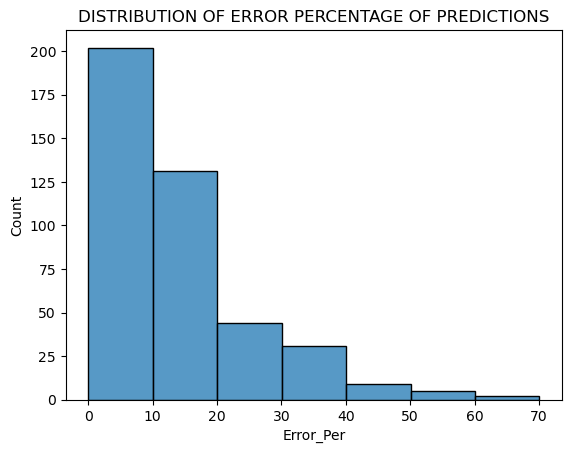

In [30]:
sns.histplot(table1.Error_Per,binwidth=10)
plt.title("DISTRIBUTION OF ERROR PERCENTAGE OF PREDICTIONS");

In [31]:
table1.Error_Per.sort_values().tail(20)

119    36.21
110    38.02
143    38.28
329    39.45
187    41.25
32     43.18
102    43.31
246    44.17
168    46.60
12     46.60
98     47.58
358    47.88
22     49.29
391    52.55
14     54.92
19     55.42
151    55.63
15     57.04
4      61.22
345    63.12
Name: Error_Per, dtype: float64

Bu ürünlerin bizim veri setimizdeki satırlarını görelim:

In [32]:
ers = pd.Series( round( ( np.abs( np.exp(pred1)-np.exp(y1_val) ) / np.exp(y1_val) )*100,2 ).sort_values() ) 
df.iloc[ers[ers > 40].index]

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
518,2.0,0,15.6,4.0,2.0,Marka Grantili,19999.00,8,4,512.0,...,0,0,0,0,0,0,0,1,0,0
1993,3.0,0,14.0,1.0,2.0,Resmi Distribütör Garantili,33990.00,16,1,1024.0,...,0,0,0,0,0,0,0,1,0,0
1737,3.0,0,15.6,2.0,2.0,Resmi Distribütör Garantili,33299.00,16,8,512.0,...,0,0,0,0,0,0,1,0,0,0
496,2.0,1,17.0,12.0,2.0,Resmi Distribütör Garantili,103885.03,64,8,512.0,...,0,0,0,0,0,0,0,0,1,0
1994,3.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,82970.31,64,4,512.0,...,0,0,0,0,0,0,0,0,1,0
45,3.0,0,15.6,2.0,2.0,Resmi Distribütör Garantili,12899.00,8,10,512.0,...,0,0,0,0,0,0,1,0,0,0
918,2.0,0,17.3,2.0,2.0,Marka Grantili,19303.08,16,4,512.0,...,0,0,0,0,0,0,0,1,0,0
751,3.0,0,15.6,0.0,2.0,Resmi Distribütör Garantili,15954.53,16,4,1024.0,...,0,0,0,0,0,0,0,1,0,0
922,3.0,0,15.6,2.0,2.0,Resmi Distribütör Garantili,19056.47,32,4,512.0,...,0,0,0,0,0,0,0,1,0,0
947,3.0,0,15.6,2.0,2.0,Resmi Distribütör Garantili,17415.76,16,4,256.0,...,0,0,0,0,0,0,0,1,0,0


### Reducing number of features

In [33]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X2 = df.drop(["Price","Price_Log","Garanti Tipi","İşletim Sistemi","İşlemci Çekirdek Sayısı","Çözünürlük Standartı",
                 "Ekran Kartı Bellek Tipi_DDR4","Ekran Kartı Bellek Tipi_GDDR5"],axis=1)
y2 = df.Price_Log

# Train/Test Ayrımı
X2_train, x2_test, Y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x2_train, x2_val, y2_train, y2_val = train_test_split(X2_train, Y2_train, test_size=0.25, random_state=42)

In [34]:
# Modeli Oluşturma
lreg2 = LinearRegression()

lreg2.fit(x2_train,y2_train)

pred2 = lreg2.predict(x2_val)

# MSE Hesabı
mse2 = np.mean((pred2 - y2_val)**2)
print("MSE: ", mse2)

# R2 Skor
print("R2 Score: ", lreg2.score(x2_val, y2_val))

MSE:  0.034153256413394076
R2 Score:  0.9076657822327507


In [35]:
# Modeli Oluşturma
model2 = sm.OLS(y2_train, x2_train)

# Modeli Eğitme
fit2 = model2.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.247e+04
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:06:43   Log-Likelihood:                         -518.78
No. Observations:                1270   AIC:                                      1100.
Df Residuals:                    1239   BIC:                                      1259.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Cihaz Ağırlığı                    0.1971      0.028      6.944      0.000       0.141       0.253
Dokunmatik Ekran                  0.1350      0.075      1.793      0.073      -0.013       0.283
Ekran Boyutu                      0.3785      0.009     42.877      0.000       0.361       0.396
Ekran Kartı Hafızası             -0.0043      0.009     -0.494      0.621      -0.021       0.013
Garanti Süresi                    0.5022      0.033     15.051      0.000       0.437       0.568
Ram (Sistem Belleği)              0.0037      0.001      6.372      0.000       0.003       0.005
Ram (Sistem Belleği) Tipi         0.0728      0.011      6.413      0.000       0.051       0.095
SSD Kapasitesi                 9.338e-05      2e-05      4.668      0.000    5.41e-05       0.000
Star                             -0.0244      0.006     -3.778      0.000      -0.037      -0.012
Çözünürlük                        0.2552      0.035      7.193      0.000       0.186       0.325
İşlemci Nesli                     0.0189      0.010      1.954      0.051   -7.28e-05       0.038
Brand_ASUS                        0.3998      0.064      6.216      0.000       0.274       0.526
Brand_Apple                       1.6015      0.379      4.230      0.000       0.859       2.344
Brand_Dell                        0.5079      0.070      7.272      0.000       0.371       0.645
Brand_HP                          0.4003      0.066      6.024      0.000       0.270       0.531
Brand_LENOVO                      0.5133      0.063      8.149      0.000       0.390       0.637
Brand_MSI                         0.4700      0.092      5.089      0.000       0.289       0.651
Ekran Kartı Bellek Tipi_GDDR6     0.1489      0.035      4.245      0.000       0.080       0.218
Ekran Kartı Bellek Tipi_SD       -0.2213      0.042     -5.225      0.000      -0.304      -0.138
Kullanım Amacı_Ofis - İş          0.3938      0.052      7.640      0.000       0.293       0.495
Kullanım Amacı_Oyun               0.3907      0.056      6.943      0.000       0.280       0.501
Kullanım Amacı_Tasarım           -0.0417      0.163     -0.256      0.798      -0.361       0.278
İşlemci Tipi_AMD Ryzen 3          0.6368      0.162      3.936      0.000       0.319       0.954
İşlemci Tipi_AMD Ryzen 5          0.9932      0.133      7.466      0.000       0.732       1.254
İşlemci Tipi_AMD Ryzen 7          1.1224      0.130      8.665      0.000       0.868       1.377
İşlemci Tipi_Intel Celeron        0.1119      0.186      0.603      0.547      -0.252       0.476
İşlemci Tipi_Intel Core i3        0.5202      0.161      3.225      0.001       0.204       0.837
İşlemci Tipi_Intel Core i5        0.7883    

In [36]:
np.abs(np.exp(pred2) - np.exp(y2_val)).describe()

count      424.000000
mean      5011.825002
std       5624.303934
min          3.290381
25%       1385.439453
50%       3515.739128
75%       6903.824328
max      44697.377404
Name: Price_Log, dtype: float64

Ortalama ortalama hata 5200. Ancak çok yüksek fiyatlı ürünler olduğundan o kadar kötü bir sonuç değil.

In [37]:
table2= my_table(y2_val,pred2)
table2.sort_values(by="Error_Per")

Mean Error Percentage :  14.02227722630591
Mean Squared Error    :  0.034153256413394076


,Actual,Prediction,Diff,EP,Error_Per,+/-
229,98002,98005,3.0,0.00,0.00,+
259,19789,19797,8.0,0.04,0.04,+
48,49407,49498,91.0,0.18,0.18,+
199,32399,32339,-60.0,-0.19,0.19,-
277,25688,25737,49.0,0.19,0.19,+
...,...,...,...,...,...,...
22,19056,29162,10106.0,53.03,53.03,+
19,71998,111369,39371.0,54.68,54.68,+
391,17415,27158,9743.0,55.94,55.94,+
4,37194,14607,-22587.0,-60.73,60.73,-


In [38]:
table2.Error_Per.describe()

count    424.000000
mean      14.022335
std       11.978277
min        0.000000
25%        5.160000
50%       11.305000
75%       19.357500
max       66.730000
Name: Error_Per, dtype: float64

Yüzde 14 ün üzerinde yanılma oranı gösteren tahminleri görelim:

In [39]:
table2[table2.Error_Per > 14].sort_values(by="Error_Per")

,Actual,Prediction,Diff,EP,Error_Per,+/-
124,54499,62173,7674.0,14.08,14.08,+
273,34336,39182,4846.0,14.11,14.11,+
204,71004,60913,-10091.0,-14.21,14.21,-
223,55123,47192,-7931.0,-14.39,14.39,-
234,49999,42714,-7285.0,-14.57,14.57,-
...,...,...,...,...,...,...
22,19056,29162,10106.0,53.03,53.03,+
19,71998,111369,39371.0,54.68,54.68,+
391,17415,27158,9743.0,55.94,55.94,+
4,37194,14607,-22587.0,-60.73,60.73,-


C:\Users\ersin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


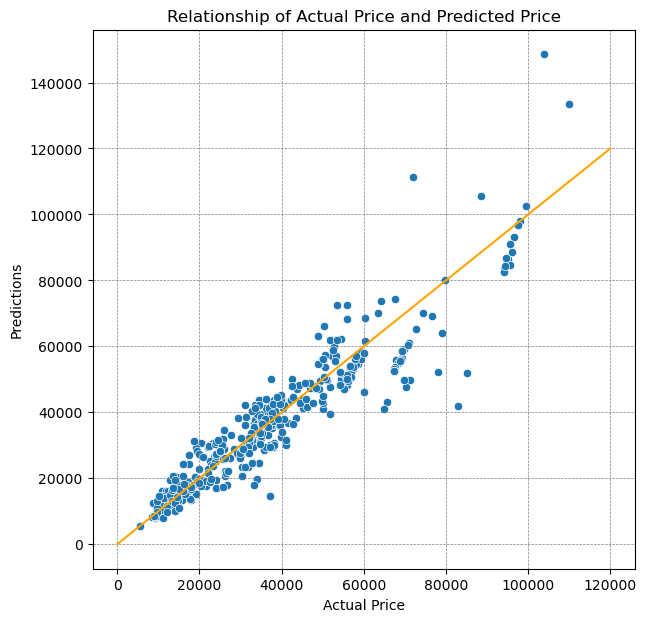

In [40]:
# exponansiyel alındıktan sonra orijinal fiyatlar üzerinden tahmin grafiği
plt.figure(figsize=[7,7])
sns.scatterplot(np.exp(y2_val),np.exp(lreg2.predict(x2_val)))
ers=np.linspace(0,120000,120000)
plt.plot(ers,ers,"orange")
plt.xlabel("Actual Price")
plt.ylabel("Predictions")
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.title("Relationship of Actual Price and Predicted Price");
plt.savefig("Relationship of Actual Price and Predicted Price");

Mean Error Percentage :  14.02227722630591
Mean Squared Error    :  0.034153256413394076


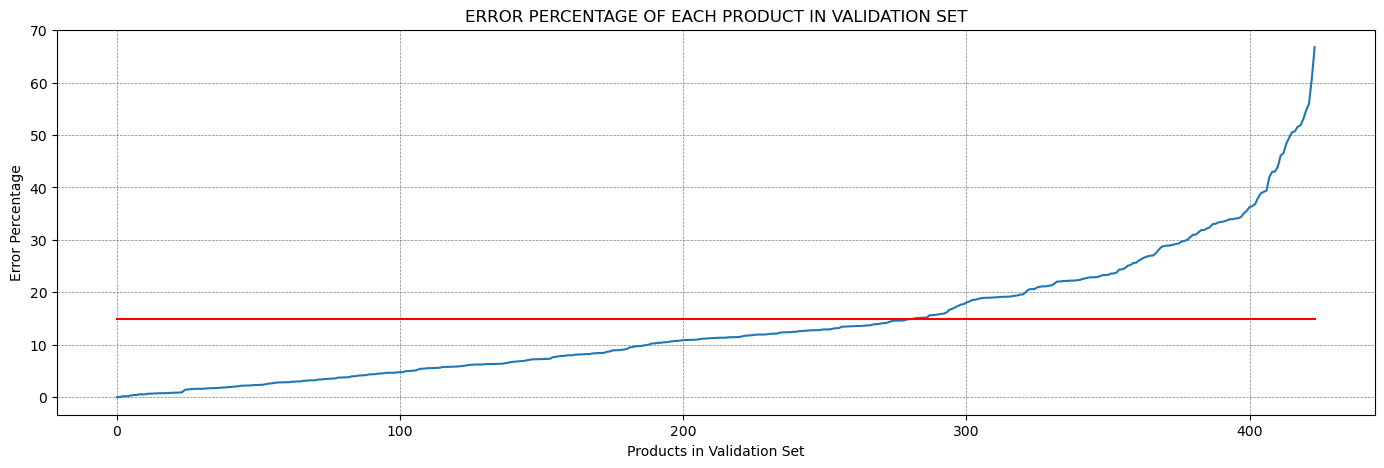

In [41]:
ersin=pd.DataFrame(my_table(y2_val,pred2).Error_Per.sort_values().reset_index(drop=True))

plt.figure(figsize=[17,5])
plt.plot(ersin)
plt.plot(range(0,len(y2_val)),[15]*len(y2_val),"r")
plt.xlabel("Products in Validation Set")
plt.ylabel("Error Percentage")
plt.title("ERROR PERCENTAGE OF EACH PRODUCT IN VALIDATION SET")
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.savefig("err.png")

Fiyata göre yanılma yüzdelerini inceleyelim.

C:\Users\ersin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


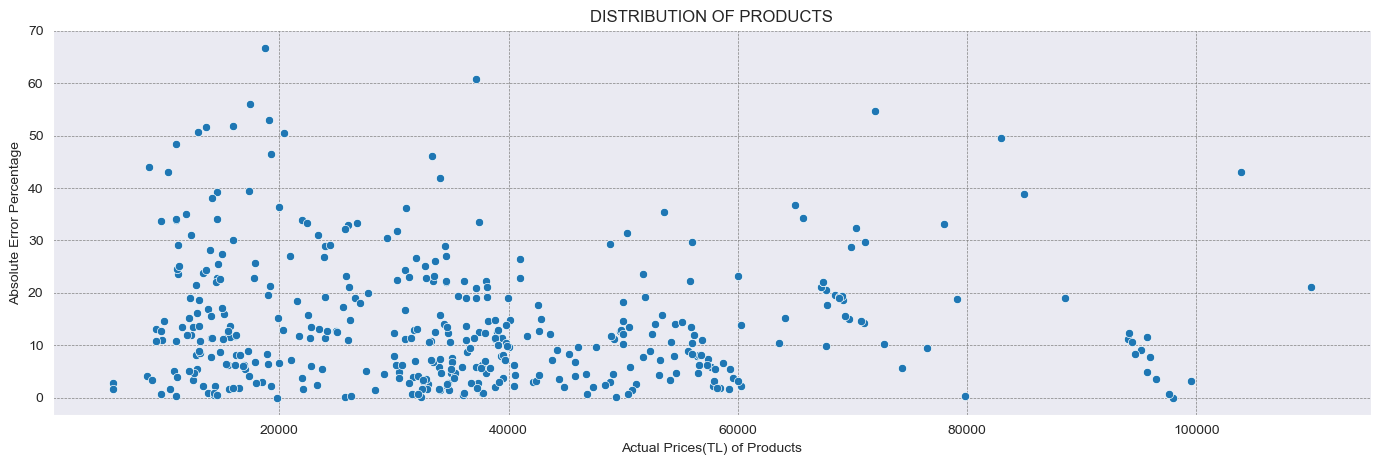

In [89]:
plt.figure(figsize=[17,5])
sns.scatterplot(table2.Actual,table2.Error_Per)
plt.xlabel("Actual Prices(TL) of Products")
plt.ylabel("Absolute Error Percentage")
plt.title("DISTRIBUTION OF PRODUCTS")
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)

In [43]:
round(np.mean(table2[(table2.Actual>0) & (20000 >=table2.Actual)].Error_Per),2)

16.93

In [44]:
round(np.mean(table2[(table2.Actual>20000) & (40000 >=table2.Actual)].Error_Per),2)

13.35

In [45]:
round(np.mean(table2[(table2.Actual>40000) & (60000 >=table2.Actual)].Error_Per),2)

9.74

In [46]:
round(np.mean(table2[(table2.Actual>60000) & (80000 >=table2.Actual)].Error_Per),2)

19.44

In [47]:
round(np.mean(table2[(table2.Actual>80000)].Error_Per),2)

14.21

<Figure size 1700x500 with 0 Axes>

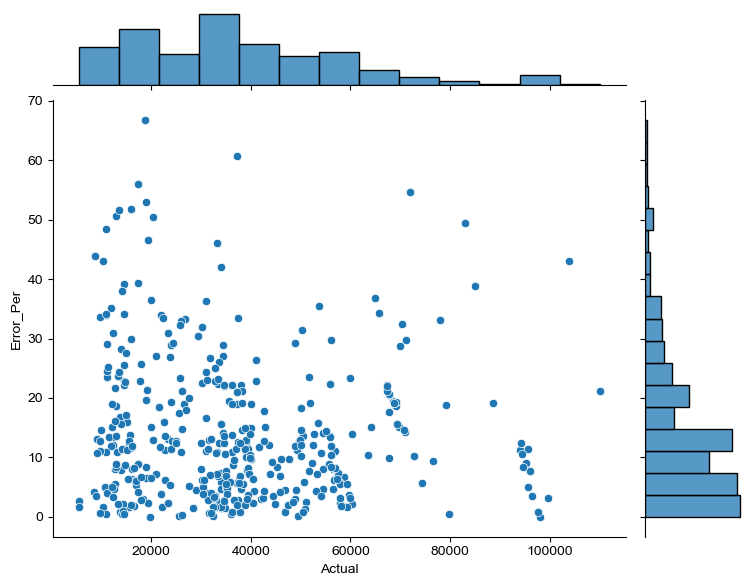

In [48]:
plt.figure(figsize=[17,5])
g=sns.jointplot(x="Actual",y="Error_Per",data=table2,height=6, )
plt.xlabel("Price in Turkish Lira")
plt.ylabel("(Absolute) Error Percentage");
sns.set_style("darkgrid")
g.fig.set_figwidth(8)
g.fig.set_figheight(6)


Değişkenlerin Katsayılarını görelim:

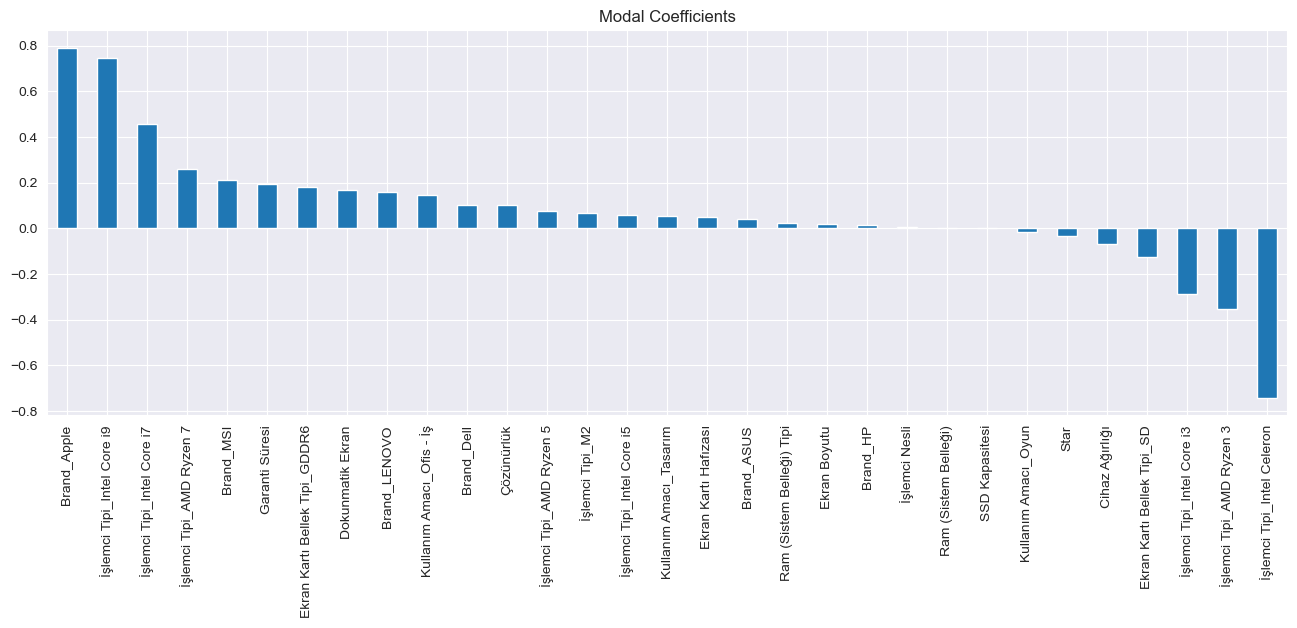

In [49]:
predictors = x2_train.columns
coef = pd.Series(lreg2.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Modal Coefficients');

Not: SSD kapasitesi ve oyun bilgisayarı negatif etki yaratması mantıksız oldu.

### Standart Scaler ile değişkenleri ölçekleyelim

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
std_scale = StandardScaler()
X_ss = std_scale.fit_transform(df.drop(["Price","Price_Log","Garanti Tipi","İşletim Sistemi"],axis=1).values)

In [52]:
X_ss

array([[-1.0735314 , -0.15389262,  0.124444  , ..., -1.12375287,
        -0.26908189, -0.05758441],
       [-1.0735314 , -0.15389262,  0.124444  , ..., -1.12375287,
        -0.26908189, -0.05758441],
       [-1.0735314 , -0.15389262,  0.124444  , ..., -1.12375287,
        -0.26908189, -0.05758441],
       ...,
       [-1.0735314 , -0.15389262,  0.124444  , ..., -1.12375287,
        -0.26908189, -0.05758441],
       [-1.0735314 , -0.15389262,  0.124444  , ..., -1.12375287,
        -0.26908189, -0.05758441],
       [-1.0735314 , -0.15389262,  0.124444  , ..., -1.12375287,
        -0.26908189, -0.05758441]])

In [53]:
df.drop(["Price","Price_Log","Garanti Tipi","İşletim Sistemi"],axis=1).columns

Index(['Cihaz Ağırlığı', 'Dokunmatik Ekran', 'Ekran Boyutu',
       'Ekran Kartı Hafızası', 'Garanti Süresi', 'Ram (Sistem Belleği)',
       'Ram (Sistem Belleği) Tipi', 'SSD Kapasitesi', 'Star', 'Çözünürlük',
       'Çözünürlük Standartı', 'İşlemci Nesli', 'İşlemci Çekirdek Sayısı',
       'Brand_ASUS', 'Brand_Apple', 'Brand_Dell', 'Brand_HP', 'Brand_LENOVO',
       'Brand_MSI', 'Ekran Kartı Bellek Tipi_DDR4',
       'Ekran Kartı Bellek Tipi_GDDR5', 'Ekran Kartı Bellek Tipi_GDDR6',
       'Ekran Kartı Bellek Tipi_SD', 'Kullanım Amacı_Ofis - İş',
       'Kullanım Amacı_Oyun', 'Kullanım Amacı_Tasarım',
       'İşlemci Tipi_AMD Ryzen 3', 'İşlemci Tipi_AMD Ryzen 5',
       'İşlemci Tipi_AMD Ryzen 7', 'İşlemci Tipi_Intel Celeron',
       'İşlemci Tipi_Intel Core i3', 'İşlemci Tipi_Intel Core i5',
       'İşlemci Tipi_Intel Core i7', 'İşlemci Tipi_Intel Core i9',
       'İşlemci Tipi_M2'],
      dtype='object')

In [54]:
X_ss = pd.DataFrame(X_ss,columns=df.drop(["Price","Price_Log","Garanti Tipi","İşletim Sistemi"],axis=1).columns)

In [55]:
X_ss

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Garanti Süresi,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,Star,Çözünürlük,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
0,-1.073531,-0.153893,0.124444,0.251474,-0.58434,-0.596809,-0.38512,-1.006368,1.680225,-0.244824,...,-0.072254,-0.092582,4.640249,-0.355803,-0.068875,-0.143954,-0.457060,-1.123753,-0.269082,-0.057584
1,-1.073531,-0.153893,0.124444,0.251474,-0.58434,-0.987608,-0.38512,-0.553217,1.647018,-0.244824,...,-0.072254,-0.092582,4.640249,-0.355803,-0.068875,-0.143954,-0.457060,-1.123753,-0.269082,-0.057584
2,-1.073531,-0.153893,0.124444,0.251474,-0.58434,-0.596809,-0.38512,-0.553217,1.651762,-0.244824,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
3,0.924482,-0.153893,0.124444,-1.337257,-0.58434,-0.987608,-0.38512,-1.006368,1.665993,-0.244824,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
4,-1.073531,-0.153893,0.124444,0.251474,-0.58434,-0.596809,-0.38512,0.353085,1.756126,-0.244824,...,-0.072254,-0.092582,-0.215506,2.810544,-0.068875,-0.143954,-0.457060,-1.123753,-0.269082,-0.057584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,-1.073531,-0.153893,0.124444,0.251474,-0.58434,1.747989,-0.38512,-0.553217,-0.615773,-0.244824,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
2114,-1.073531,-0.153893,0.124444,0.251474,-0.58434,0.184790,-0.38512,-0.553217,-0.615773,-0.244824,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
2115,-1.073531,-0.153893,0.124444,0.251474,-0.58434,-0.596809,-0.38512,0.353085,-0.615773,-0.244824,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584
2116,-1.073531,-0.153893,0.124444,0.251474,-0.58434,-0.596809,-0.38512,-0.553217,-0.615773,-0.244824,...,-0.072254,-0.092582,-0.215506,-0.355803,-0.068875,-0.143954,2.187895,-1.123753,-0.269082,-0.057584


In [56]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X5 = X_ss
y5 = df.Price_Log

# Train/Test Ayrımı
X5_train, x5_test, Y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x5_train, x5_val, y5_train, y5_val = train_test_split(X5_train, Y5_train, test_size=0.25, random_state=42)

In [57]:
# Modeli Oluşturma
model5 = sm.OLS(y5_train, x5_train)

# Modeli Eğitme
fit5 = model5.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_Log   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):             -0.012
Method:                 Least Squares   F-statistic:                             0.5832
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                       0.976
Time:                        11:06:48   Log-Likelihood:                         -4763.7
No. Observations:                1270   AIC:                                      9597.
Df Residuals:                    1235   BIC:                                      9778.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Cihaz Ağırlığı                    0.3658      0.432      0.846      0.398      -0.482       1.214
Dokunmatik Ekran                  0.5843      0.322      1.817      0.069      -0.047       1.215
Ekran Boyutu                      0.0528      0.351      0.150      0.880      -0.636       0.742
Ekran Kartı Hafızası              0.4372      0.644      0.679      0.497      -0.826       1.701
Garanti Süresi                    0.1212      0.444      0.273      0.785      -0.751       0.993
Ram (Sistem Belleği)             -0.0137      0.337     -0.041      0.968      -0.675       0.647
Ram (Sistem Belleği) Tipi        -0.3565      0.476     -0.750      0.454      -1.289       0.577
SSD Kapasitesi                    0.1321      0.322      0.410      0.682      -0.500       0.764
Star                             -0.3617      0.389     -0.931      0.352      -1.124       0.401
Çözünürlük                       -0.6391      0.432     -1.480      0.139      -1.486       0.208
Çözünürlük Standartı             -0.1532      0.390     -0.392      0.695      -0.919       0.613
İşlemci Nesli                    -0.7975      0.738     -1.081      0.280      -2.245       0.650
İşlemci Çekirdek Sayısı           0.3587      0.479      0.749      0.454      -0.581       1.299
Brand_ASUS                       -0.2578      0.715     -0.361      0.718      -1.660       1.144
Brand_Apple                       0.4341      0.665      0.653      0.514      -0.870       1.738
Brand_Dell                       -0.1894      0.691     -0.274      0.784      -1.544       1.166
Brand_HP                          0.0378      0.652      0.058      0.954      -1.242       1.318
Brand_LENOVO                      0.0886      0.913      0.097      0.923      -1.703       1.881
Brand_MSI                         0.2623      0.359      0.731      0.465      -0.442       0.966
Ekran Kartı Bellek Tipi_DDR4     -0.1006      0.620     -0.162      0.871      -1.317       1.116
Ekran Kartı Bellek Tipi_GDDR5     0.2434      0.945      0.258      0.797      -1.610       2.097
Ekran Kartı Bellek Tipi_GDDR6     0.1839      1.255      0.147      0.884      -2.278       2.646
Ekran Kartı Bellek Tipi_SD        0.0992      0.833      0.119      0.905      -1.535       1.733
Kullanım Amacı_Ofis - İş         -0.4834      0.712     -0.679      0.497      -1.879       0.913
Kullanım Amacı_Oyun              -0.2897      0.750     -0.386      0.699      -1.762       1.182
Kullanım Amacı_Tasarım           -0.1484      0.336     -0.442      0.659      -0.807       0.511
İşlemci Tipi_AMD Ryzen 3          0.0965      0.444      0.217      0.828      -0.774       0.967
İşlemci Tipi_AMD Ryzen 5         -0.3647    

Eğitim verisi üzerinde R skor çok kötü, p değerleri de çok yüksek çıktı. ancak test verisinde R skor çok iyi

In [58]:
from sklearn.linear_model import LinearRegression

# Modeli Oluşturma
lreg5 = LinearRegression()

lreg5.fit(x5_train,y5_train)

pred5 = lreg5.predict(x5_val)

# MSE Hesabı
mse5 = np.mean((pred5 - y5_val)**2)
print("MSE: ", mse5)

# R2 Skor
print("R2 Score: ", lreg5.score(x5_val, y5_val))

MSE:  0.03278678155860691
R2 Score:  0.9113600825737838


In [59]:
print('X Train:', x5_train.shape)
print('X Validation:', x5_val.shape)
print('X test:', x5_test.shape)

X Train: (1270, 35)
X Validation: (424, 35)
X test: (424, 35)


In [60]:
y5_train=y5_train.values.reshape(-1,1)

In [61]:
table5 = my_table(y5_val,pred5)
table5.sort_values(by="Error_Per")

Mean Error Percentage :  13.617302998801588
Mean Squared Error    :  0.03278678155860691


,Actual,Prediction,Diff,EP,Error_Per,+/-
256,35099,35117,18.0,0.05,0.05,+
400,35214,35186,-28.0,-0.08,0.08,-
216,31314,31285,-29.0,-0.09,0.09,-
68,10968,10958,-10.0,-0.10,0.10,-
56,34671,34633,-38.0,-0.11,0.11,-
...,...,...,...,...,...,...
19,71998,111902,39904.0,55.42,55.42,+
151,13569,21118,7549.0,55.63,55.63,+
15,10945,17189,6244.0,57.04,57.04,+
4,37194,14426,-22768.0,-61.22,61.22,-


hata payı yüzde 13 ün üzerinde olanları görelim

In [62]:
ers = pd.Series( round( ( np.abs( np.exp(pred5)-np.exp(y5_val) ) / np.exp(y5_val) )*100,2 ).sort_values() ) 
df.iloc[ers[ers > 13].index]

,Cihaz Ağırlığı,Dokunmatik Ekran,Ekran Boyutu,Ekran Kartı Hafızası,Garanti Süresi,Garanti Tipi,Price,Ram (Sistem Belleği),Ram (Sistem Belleği) Tipi,SSD Kapasitesi,...,Kullanım Amacı_Tasarım,İşlemci Tipi_AMD Ryzen 3,İşlemci Tipi_AMD Ryzen 5,İşlemci Tipi_AMD Ryzen 7,İşlemci Tipi_Intel Celeron,İşlemci Tipi_Intel Core i3,İşlemci Tipi_Intel Core i5,İşlemci Tipi_Intel Core i7,İşlemci Tipi_Intel Core i9,İşlemci Tipi_M2
920,2.0,0,15.6,6.0,2.0,Resmi Distribütör Garantili,43783.83,64,8,512.0,...,0,0,0,0,0,0,0,1,0,0
2035,2.0,0,15.6,4.0,2.0,Resmi Distribütör Garantili,38996.98,16,4,1024.0,...,0,0,0,0,0,0,0,1,0,0
1212,3.0,0,15.6,8.0,3.0,Resmi Distribütör Garantili,95696.85,32,4,1024.0,...,0,0,0,0,0,0,0,0,1,0
7,2.0,0,15.6,6.0,2.0,Resmi Distribütör Garantili,29999.00,16,8,512.0,...,0,0,0,1,0,0,0,0,0,0
1698,2.0,0,15.6,2.0,2.0,Resmi Distribütör Garantili,33249.99,64,4,256.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2.0,0,16.0,12.0,2.0,Marka Grantili,71999.00,32,8,2048.0,...,1,0,0,0,0,0,0,0,1,0
253,3.0,0,15.6,2.0,2.0,Marka Grantili,13569.00,16,4,512.0,...,0,0,0,0,0,0,1,0,0,0
269,2.0,0,15.6,0.0,2.0,Resmi Distribütör Garantili,10945.29,8,4,256.0,...,0,0,0,1,0,0,0,0,0,0
2022,2.0,0,14.0,0.0,2.0,Resmi Distribütör Garantili,37194.22,1,4,128.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
table5.Error_Per.describe()

count    424.000000
mean      13.617288
std       11.870511
min        0.050000
25%        5.040000
50%       10.755000
75%       19.055000
max       63.120000
Name: Error_Per, dtype: float64

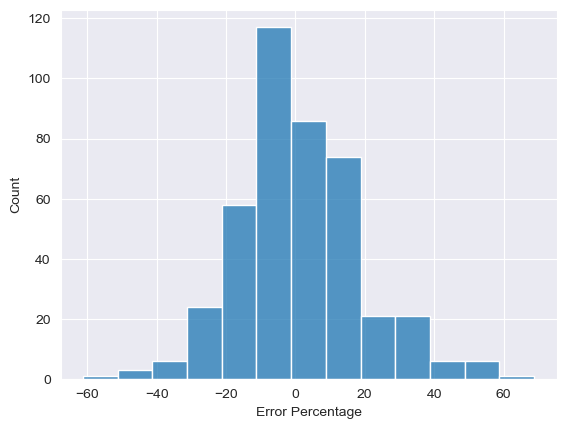

In [64]:
sns.histplot( table5.EP, binwidth=10 )
plt.xlabel("Error Percentage");

<AxesSubplot:xlabel='Error_Per', ylabel='Count'>

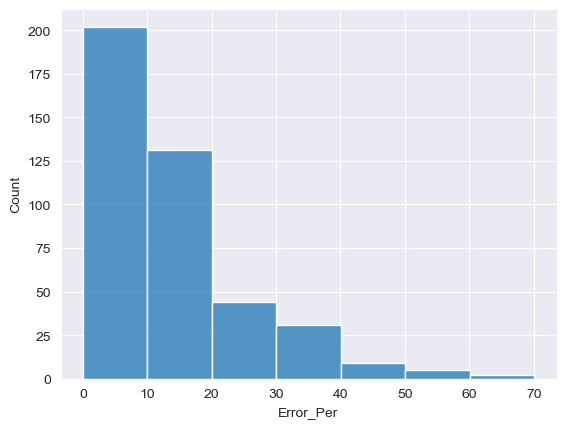

In [65]:
sns.histplot(table5.Error_Per,binwidth=10)
# mutlak hata

C:\Users\ersin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


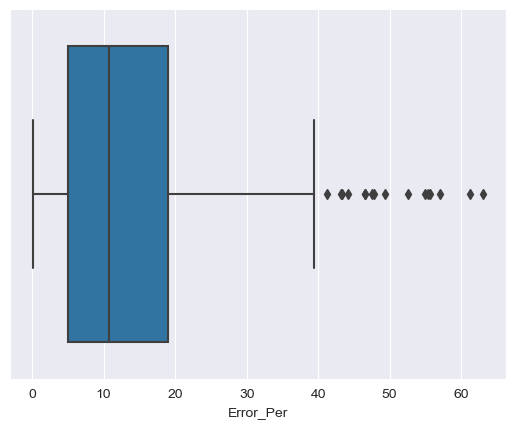

In [87]:
sns.boxplot(table5.Error_Per);

Text(0.5, 1.0, 'ERROR PERCENTAGE OF EACH PRODUCTS IN VALIDATION SET')

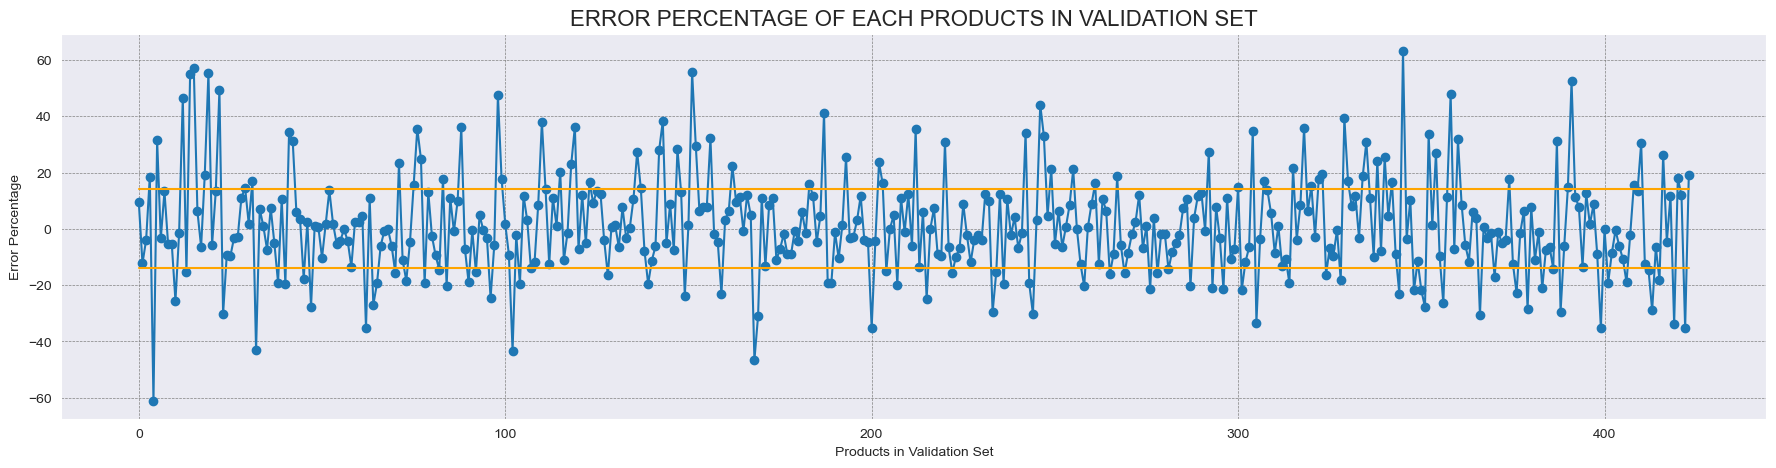

In [67]:
plt.figure(figsize=[22,5])
plt.plot(table5.EP,marker="o")
plt.plot(range(0,len(y5_val)),[14]*len(y5_val),color="orange") # mean error line
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.plot(range(0,len(y5_val)),[-14]*len(y5_val),color="orange") # mean error line
plt.xlabel("Products in Validation Set")
plt.ylabel("Error Percentage")
plt.title("ERROR PERCENTAGE OF EACH PRODUCTS IN VALIDATION SET",fontsize=16)


After reordering the products with respect to their (absolute) error percentage: 

Mean Error Percentage :  13.617302998801588
Mean Squared Error    :  0.03278678155860691


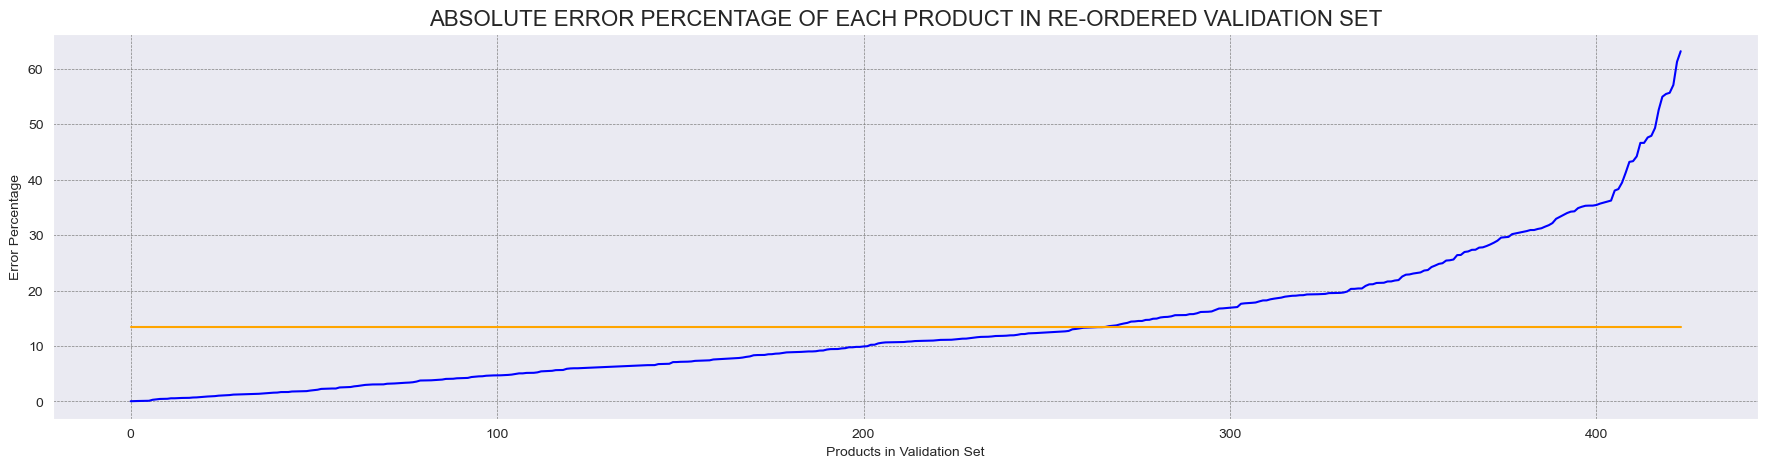

In [68]:
ersin5=pd.DataFrame(my_table(y5_val,pred5).Error_Per.sort_values().reset_index(drop=True))

plt.figure(figsize=[22,5])
plt.plot(ersin5,'b')
plt.plot(range(0,len(y5_val)),[13.5]*len(y5_val),color="orange") # mean error line
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.xlabel("Products in Validation Set")
plt.ylabel("Error Percentage")
plt.title("ABSOLUTE ERROR PERCENTAGE OF EACH PRODUCT IN RE-ORDERED VALIDATION SET",fontsize=16)
plt.savefig("err5.png")

In [69]:
table5.sort_values(by="Error_Per")

,Actual,Prediction,Diff,EP,Error_Per,+/-
256,35099,35117,18.0,0.05,0.05,+
400,35214,35186,-28.0,-0.08,0.08,-
216,31314,31285,-29.0,-0.09,0.09,-
68,10968,10958,-10.0,-0.10,0.10,-
56,34671,34633,-38.0,-0.11,0.11,-
...,...,...,...,...,...,...
19,71998,111902,39904.0,55.42,55.42,+
151,13569,21118,7549.0,55.63,55.63,+
15,10945,17189,6244.0,57.04,57.04,+
4,37194,14426,-22768.0,-61.22,61.22,-


C:\Users\ersin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


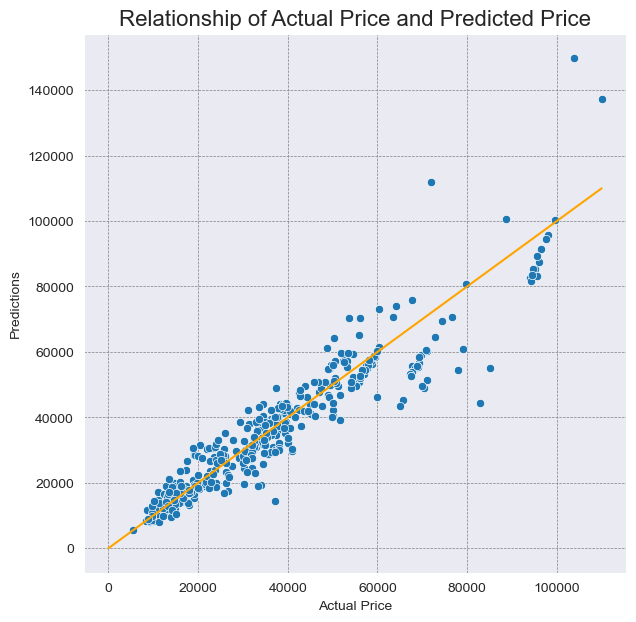

In [70]:
# exponansiyel alındıktan sonra orijinal fiyatlar üzerinden tahmin grafiği
plt.figure(figsize=[7,7])
sns.scatterplot(np.exp(y5_val),np.exp(pred5))
ers=np.linspace(0,110000,110000)
plt.plot(ers,ers,"orange")
plt.xlabel("Actual Price")
plt.ylabel("Predictions")
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.title("Relationship of Actual Price and Predicted Price",fontsize=16);
plt.savefig("Relationship of Actual Price and Predicted Price5");

<AxesSubplot:xlabel='Error_Per', ylabel='Count'>

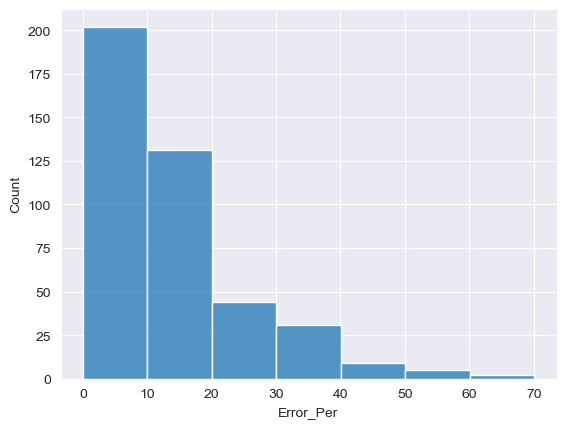

In [71]:
sns.histplot(table5.Error_Per,binwidth=10)

# Ridge Regression

In [72]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from joblib import load
from sklearn.metrics import mean_squared_error

X2 y2 veri seti için Ridge uygulayalım

Best R-score : 0.9078223765615527
Best Alpha : 0.7906043210907697


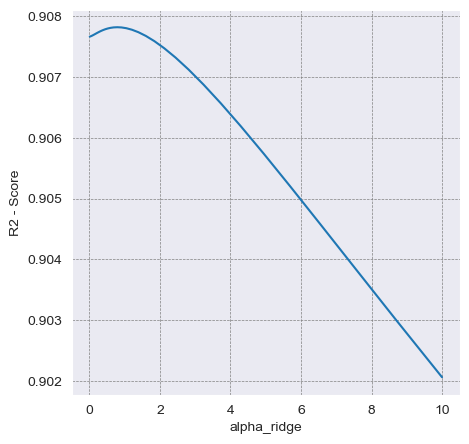

In [73]:
from sklearn.linear_model import Ridge

plt.figure(figsize=[5,5])

alpha_list=10**(np.linspace(-2,1,50))
score_list = []
MSE = np.zeros(len(alpha_list))
for index, alpha_ridge in enumerate(alpha_list):
    ridgeReg = Ridge(alpha=alpha_ridge)
    ridgeReg.fit(x2_train,y2_train)
    pred2_ridge = ridgeReg.predict(x2_val)
    score_list.append( ridgeReg.score(x2_val,y2_val) )
    MSE[index] = mean_squared_error(y2_val, pred2_ridge)

best_alpha = np.argmax(score_list)
plt.plot(alpha_list,score_list)
plt.xticks()
plt.yticks()
# plt.title("TRAFFIC PER DAYS OF THE WEEKDAY",fontweight="bold",fontsize=16)
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.ylabel('R2 - Score')
plt.xlabel("alpha_ridge");

print("Best R-score :",np.max(score_list))
print("Best Alpha :", alpha_list[best_alpha])

X5 y5 için Ridge uygulayalım:

Best R-score : 0.912344100722069
Best Alpha : 22.229964825261934


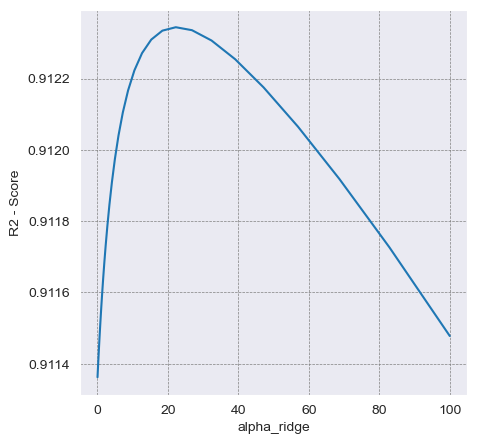

In [74]:
from sklearn.linear_model import Ridge

plt.figure(figsize=[5,5])

alpha_list=10**(np.linspace(-2,2,50))
score_list = []
MSE = np.zeros(len(alpha_list))
for index, alpha_ridge in enumerate(alpha_list):
    ridgeReg = Ridge(alpha=alpha_ridge)
    ridgeReg.fit(x5_train,y5_train)
    pred5_ridge = ridgeReg.predict(x5_val)
    score_list.append( ridgeReg.score(x5_val,y5_val) )
    MSE[index] = mean_squared_error(y5_val, pred5_ridge)

best_alpha = np.argmax(score_list) # skor listesini maksimum yapan alpha' nın alpha_list listesindeki indeksi
plt.plot(alpha_list,score_list)
plt.xticks()
plt.yticks()
# plt.title("TRAFFIC PER DAYS OF THE WEEKDAY",fontweight="bold",fontsize=16)
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.ylabel('R2 - Score')
plt.xlabel("alpha_ridge");

print("Best R-score :",np.max(score_list))
print("Best Alpha :", alpha_list[best_alpha])

In [75]:
ridgeReg = Ridge(alpha=22.2299)
ridgeReg.fit(x5_train,y5_train)
pred5_ridge_array = ridgeReg.predict(x5_val)
pred5_ridge=[]
for i in range(len(pred5_ridge_array)):
    pred5_ridge.append(pred5_ridge_array[i][0])
pred5_ridge

my_table(y5_val,pred5_ridge).sort_values(by="Error_Per")

Mean Error Percentage :  13.634213415418472
Mean Squared Error    :  0.03242280572835958


,Actual,Prediction,Diff,EP,Error_Per,+/-
49,99539,99513,-26.0,-0.03,0.03,-
382,8898,8904,6.0,0.05,0.05,+
327,22091,22132,41.0,0.19,0.19,+
56,34671,34741,70.0,0.20,0.20,+
68,10968,10938,-30.0,-0.28,0.28,-
...,...,...,...,...,...,...
15,10945,17084,6139.0,56.09,56.09,+
151,13569,21274,7705.0,56.78,56.78,+
4,37194,15929,-21265.0,-57.17,57.17,-
19,71998,113757,41759.0,58.00,58.00,+


In [76]:
np.abs(my_table(y5_val,pred5_ridge).Diff).describe()

Mean Error Percentage :  13.634213415418472
Mean Squared Error    :  0.03242280572835958


count      424.000000
mean      4869.740566
std       5562.354925
min          6.000000
25%       1414.000000
50%       3228.500000
75%       5932.750000
max      45314.000000
Name: Diff, dtype: float64

# Cross Validation

İkisi de aynı R skora sahip. O halde basit lineer regresyonu seçelim ve testteki başarısına bakalım.

In [77]:
from sklearn.model_selection import KFold
# veriyi 80 e 20 ayırdık
X, X_test, y, y_test = train_test_split(X5, y5, test_size=0.20, shuffle=True, random_state=42)
    
# Cross-validation index oluşturmasına yardımcı olmak için
X, y = np.array(X), np.array(y)
    
# Verimizi 5 parçaya ayırmaya deneyelim (n_splits=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
# Validation sonuçlarını toplayacağımız listeler
cv_lm_r2 = []
cv_lm_ridge_r2 = []
    
for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
        
    # Modellerin oluşturulması
    lm = LinearRegression()
    lm_ridge = Ridge(alpha=22.2299)
    # Modellerin eğitimi
    lm.fit(X_train, y_train)
    cv_lm_r2.append(round(lm.score(X_val, y_val),3))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    cv_lm_ridge_r2.append(round(lm_ridge.score(X_val_scaled, y_val),3))

    # Sonuçların toplanması
print('Simple regression scores: ', cv_lm_r2)
print('Ridge scores: ', cv_lm_ridge_r2, '\n')

print(f'Mean r^2 score for linear model: {np.mean(cv_lm_r2):.3f} +- {np.std(cv_lm_r2):.3f}')
print(f'Mean r^2 score for Ridge model: {np.mean(cv_lm_ridge_r2):.3f} +- {np.std(cv_lm_ridge_r2):.3f}')

Simple regression scores:  [0.915, 0.894, 0.883, 0.908, 0.891]
Ridge scores:  [0.917, 0.894, 0.884, 0.91, 0.89] 

Mean r^2 score for linear model: 0.898 +- 0.012
Mean r^2 score for Ridge model: 0.899 +- 0.012


Model olarak lineer regresyon seçebiliriz. O halde yüzde 80 eğitim verisi (X,y) ile eğitip 20 lik test verisi (X_test,y_test) üzerinde R- skoru hesaplayalım:

In [78]:
lm.fit(X,y)

LinearRegression()

In [79]:
lm.score(X_test,y_test)

C:\Users\ersin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8889545029270591

In [80]:
last_pred = lm.predict(X_test)

C:\Users\ersin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [81]:
last_table=my_table(y_test,last_pred).sort_values(by="Error_Per")
last_table

Mean Error Percentage :  13.525553163259534
Mean Squared Error    :  0.0382298044400794


,Actual,Prediction,Diff,EP,Error_Per,+/-
355,38899,38917,18.0,0.04,0.04,+
38,33378,33417,39.0,0.12,0.12,+
371,48299,48224,-75.0,-0.16,0.16,-
2,99154,99334,180.0,0.18,0.18,+
372,34371,34305,-66.0,-0.19,0.19,-
...,...,...,...,...,...,...
288,30633,13127,-17506.0,-57.15,57.15,-
160,11899,18732,6833.0,57.41,57.41,+
231,21499,34504,13005.0,60.49,60.49,+
305,12278,19949,7671.0,62.47,62.47,+


C:\Users\ersin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


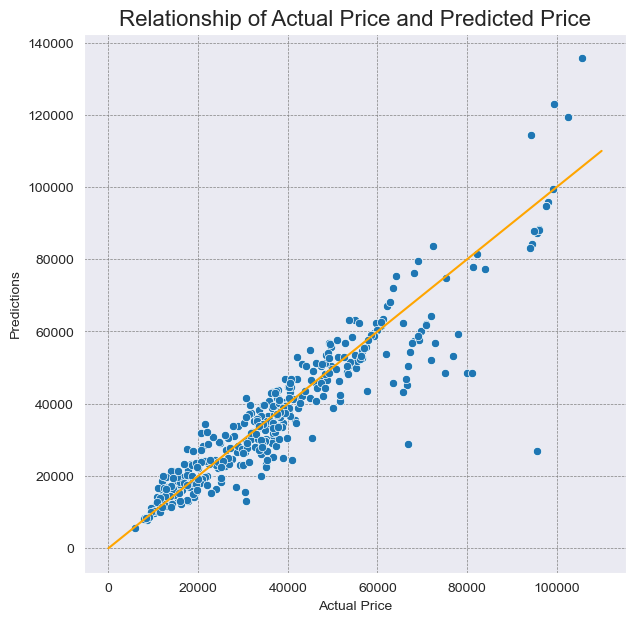

In [82]:
# exponansiyel alındıktan sonra orijinal fiyatlar üzerinden tahmin grafiği
plt.figure(figsize=[7,7])
sns.scatterplot(np.exp(y_test),np.exp(last_pred))
ers=np.linspace(0,110000,110000)
plt.plot(ers,ers,"orange")
plt.xlabel("Actual Price")
plt.ylabel("Predictions")
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.title("Relationship of Actual Price and Predicted Price",fontsize=16);

Mean Error Percentage :  13.525553163259534
Mean Squared Error    :  0.0382298044400794


<AxesSubplot:xlabel='Error_Per', ylabel='Count'>

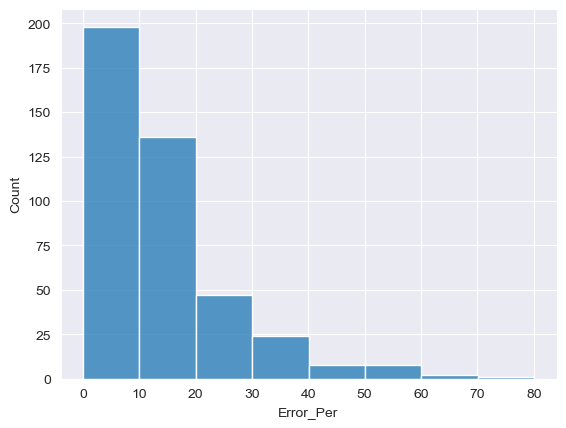

In [83]:
sns.histplot(my_table(y_test,last_pred).Error_Per,binwidth=10)

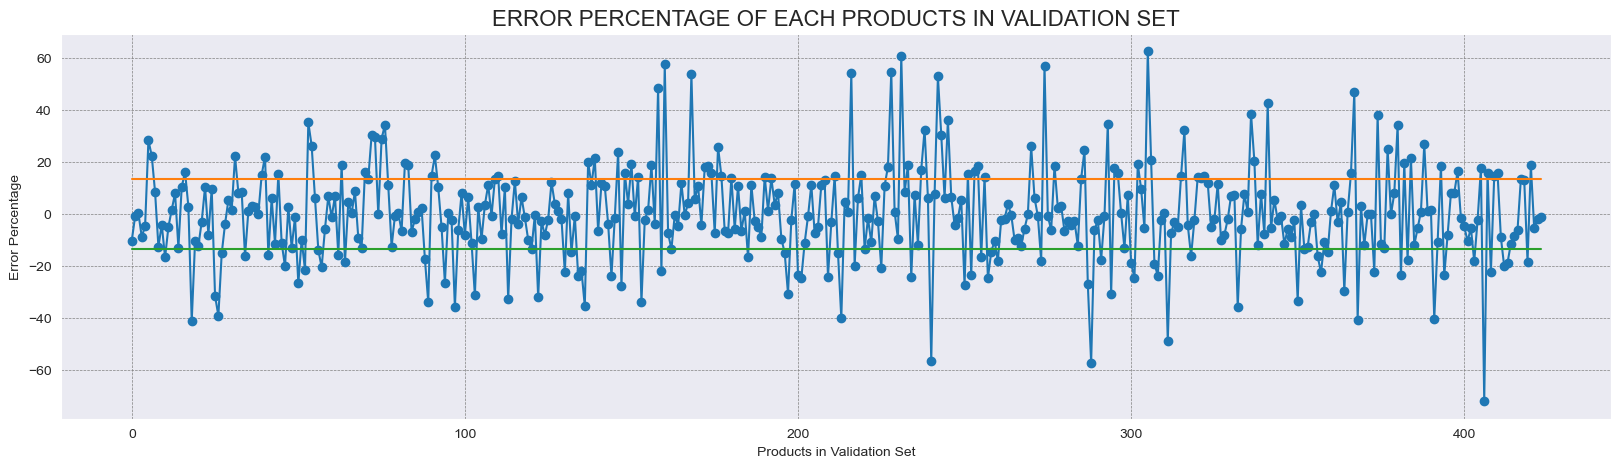

In [84]:
hata=pd.DataFrame(round( ((np.exp(last_pred)-np.exp(y_test) ) / np.exp(y_test) )*100,2 ))

plt.figure(figsize=[20,5])
plt.plot(hata.values,marker="o")
plt.plot(range(0,len(y_test)),[13.5]*len(y_test)) # mean error line
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.plot(range(0,len(y_test)),[-13.5]*len(y_test)) # mean error line
plt.xlabel("Products in Validation Set")
plt.ylabel("Error Percentage")
plt.title("ERROR PERCENTAGE OF EACH PRODUCTS IN VALIDATION SET",fontsize=16);

Mean Error Percentage :  13.525553163259534
Mean Squared Error    :  0.0382298044400794


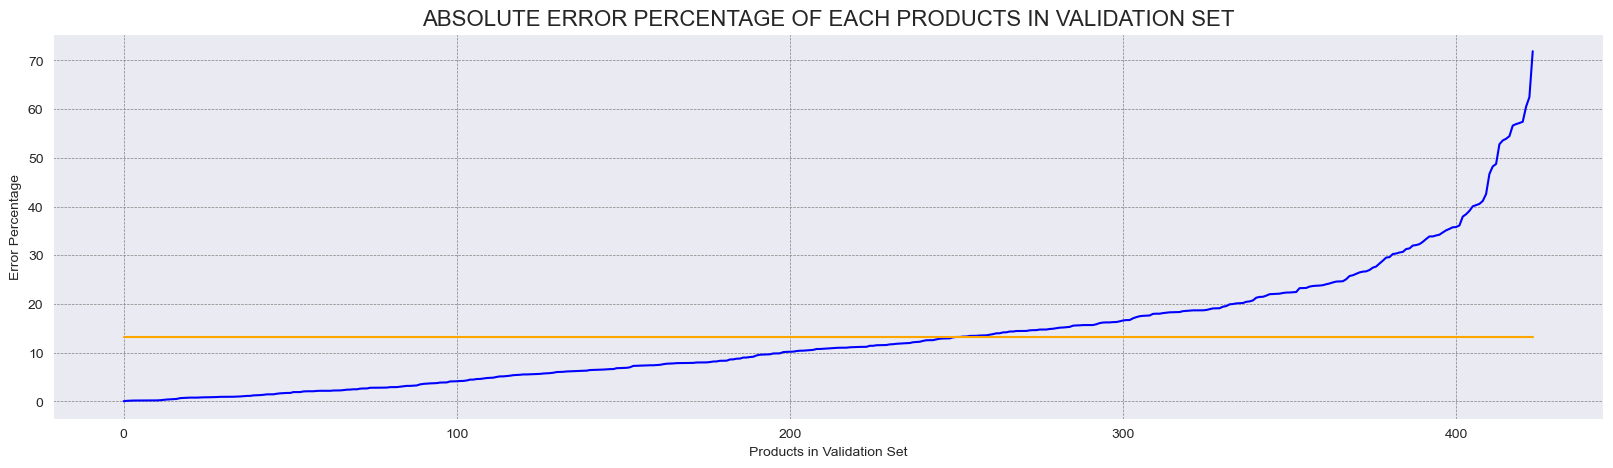

In [85]:
last_error=pd.DataFrame(my_table(y_test,last_pred).Error_Per.sort_values().reset_index(drop=True))

plt.figure(figsize=[20,5])
plt.plot(last_error,'b')
plt.plot(range(0,len(y_test)),[13.2]*len(y_test),color="orange") # mean error line
plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
plt.xlabel("Products in Validation Set")
plt.ylabel("Error Percentage")
plt.title("ABSOLUTE ERROR PERCENTAGE OF EACH PRODUCTS IN VALIDATION SET",fontsize=16);


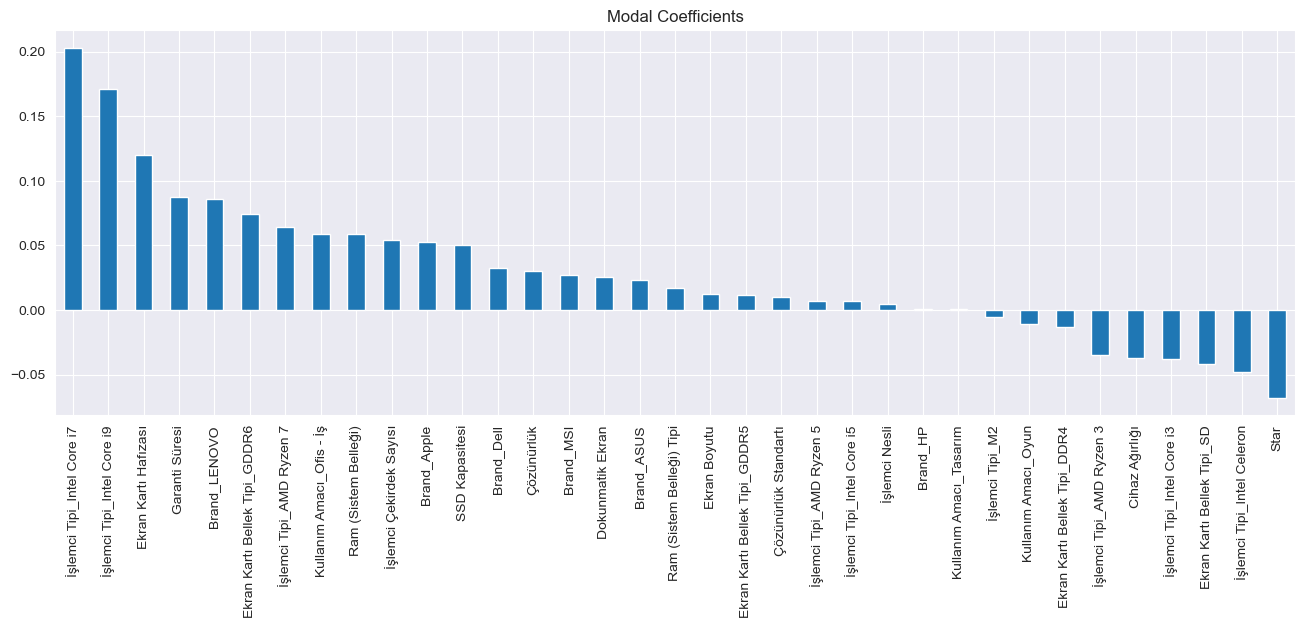

In [86]:
predictors =x5_train.columns
coef = pd.Series(lreg5.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Modal Coefficients');

* Fiyatı en fazla etkileyen değişken işlemci tipi olarak görülüyor.
* Kullanıcılar çok yüksek fiyatlı ürünlere daha düşük puan veriyor.